# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-11 (Stand: April 2024)

[Raum F1-14](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Polarisation und Doppelbrechung

Name: Vrkic Vorname: Tin E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Nock Vorname: Mika E-Mail: uttziqstudent.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo-32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Kerstin Trost

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 01.07.24

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Polarisation/README.md).**

In [1]:
import pathlib
import pandas as pd
import numpy as np
import kafe2
import scipy as sc
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp

In [2]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[], add_error=True):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    if add_error:
        fit.add_error(axis = 'x', err_val = xy_error[0])
        fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

def weighted_mean_gauss(arr):
    res = np.sum( unp.nominal_values(arr) / unp.std_devs(arr) ) / np.sum( 1 / unp.std_devs(arr) )
    return res

def std_weighted_mean_gauss(arr):
    N = unp.nominal_values(arr).size
    arr_bar = weighted_mean_gauss(arr)
    return np.sqrt( (N/(N-1)) * np.sum( (unp.nominal_values(arr)-arr_bar)**2 / unp.std_devs(arr) ) / np.sum( 1/unp.std_devs(arr) ) )

## Aufgabe 1: Polarisiertes Licht aus dem Wasserglas

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Polarisation/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Strahlen Sie Licht durch ein mit Wasser gefülltes Glas und beobachten Sie das austretende Streulicht aus verschiedenen Richtungen durch einen Polarisationsfilter. 
 * Beschreiben und erklären Sie, was Sie beobachten.
 
 ---

In diesem Versuch wurde ein mit destilliertem Wasser gefüllter Kolben mit Licht beschienen. Die Wassermoleküle besitzen einen Dipolcharakter und können so durch das Licht zum Schwingen angeregt werden. Dipole strahlen bekanntlich nicht entlang der Schwinungsachse, sondern vornehmlich im rechten Winkel zu dieser. Das durch die Dipolschwinung erzeugte linear polarisierte Licht kann im rechten Winkel zur Strahlrichtung des einfallenden Lichts aus der Lampe durch einen Polarisationsfilter beobachtet werden. Diesen Filter kann man in seiner Fassung um $360^\circ$ drehen. Die Erwartung ist, dass unter einem bestimmten Winkel im Idealfall die gesamte Intensität des gestreuten Lichts beobachtet wird und keine Intensität mehr transmittiert wird, wenn der Filter von dort aus um $90^\circ$ gedreht wird. Das kann in der Realität natürlich nicht so passieren, vor allem nicht im Praktikum, da Licht aus der Umgebung nicht polarisiert ist und das vom Wasser polarisierte Licht natürlich auch an anderen Objekten streuen kann, bevor es durch den Filter ins Auge / die Kameralinse trifft. Der Effekt ist aber groß genug, um zumindest eine Verdunklung und damit eine Abschwächung der transmittieren Intensität zu beobachten. In den Bildern unten entspricht das hellere der Situation, bei der (fast) die gesamte Intensität transmittiert wird, das hellere entsprechend der, bei der am wenigsten Intensität transmittiert wird. Die automatische Bildbearbeitung scheint beim dunkleren Bild etwas verwirrt gewesen zu sein, deshalb hat dieses wohl den gelbstich.

![wasser_heller](PicsOrItDidntHappen/wasser_heller.jpeg)
![wasser_dunkler](PicsOrItDidntHappen/wasser_dunkler.jpeg)

## Aufgabe 2: Erzeugung und Untersuchung von Licht mit verschiedener Polarisation 

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Polarisation/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Erzeugen und untersuchen Sie die Intensitätsverteilungen von verschieden polarisiertem Licht.
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Aufbau des Strahlengangs 

 * Bauen Sie geeignete Strahlengänge zur Erzeugung von **linear**, **elliptisch** und **zirkular** polarisiertem Licht auf.   
 * Bestimmen Sie die Intensitätsverteilungen des Lichts jeweils als Funktion des Winkels $\varphi$ eines zweiten linearen Polarisationsfilters.

---

Linse bei rotem Licht (lin. pol.) vor dem zweiten Polfilter  
Polfilter sind leicht Wellenlängenabhänig, deshalb wird beim roten Licht (monochrom.) der Nullpunkt besser erreicht.  


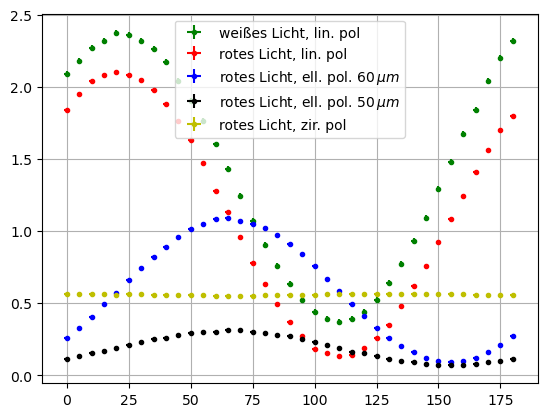

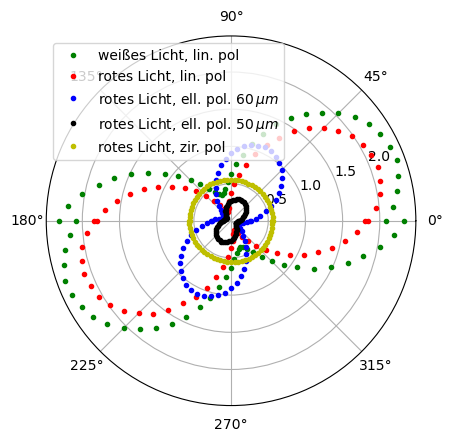

In [3]:
# Messungen
phi = unp.uarray(np.arange(0, 181, 5, dtype=np.float32), [1.])
# Weißes Licht, linear polarisiert
I_weiß_lin = unp.uarray([2.09, 2.18, 2.27, 2.32, 2.37, 2.36, 2.32, 2.26, 2.17, 2.04, 1.90, 1.76, 1.60, 1.43, 1.24, 1.07, 0.90, 0.76, 0.63, 0.52, 0.44, 0.39, 0.37, 0.39, 0.44, 0.52, 0.64, 0.77, 0.93, 1.09, 1.29, 1.48, 1.67, 1.84, 2.04, 2.2, 2.32] , [0.02]) # in Volt
# Monochromatisches Rotes Licht, linear polarisiert
I_rot_lin = unp.uarray([1.84, 1.95, 2.04, 2.08, 2.10, 2.08, 2.05, 1.98, 1.88, 1.76, 1.63, 1.47, 1.28, 1.13, 0.96, 0.78, 0.63, 0.49, 0.37, 0.27, 0.18, 0.15, 0.13, 0.14, 0.19, 0.26, 0.35, 0.48, 0.62, 0.76, 0.92, 1.08, 1.24, 1.41, 1.56, 1.70, 1.80] , [0.01])
# Monochromatisches Rotes Licht, elliptisch polarisiert, Dicke Glimmerplättchen: 60 mikrometer
I_rot_ell_60 = unp.uarray([0.26, 0.33, 0.40, 0.49, 0.57, 0.66, 0.74, 0.82, 0.89, 0.96, 1.01, 1.05, 1.08, 1.09, 1.07, 1.05, 1.02, 0.97, 0.91, 0.84, 0.76, 0.67, 0.58, 0.49, 0.41, 0.33, 0.26, 0.20, 0.16, 0.12, 0.10, 0.09, 0.10, 0.12, 0.16, 0.21, 0.27] , [0.01])
# Monochromatisches Rotes Licht, elliptisch polarisiert, Dicke Glimmerplättchen: 50 mikrometer
I_rot_ell_50 = unp.uarray([0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.26, 0.28, 0.29, 0.30, 0.30, 0.31, 0.31, 0.30, 0.29, 0.28, 0.27, 0.25, 0.23, 0.21, 0.19, 0.16, 0.15, 0.13, 0.11, 0.10, 0.09, 0.08, 0.07, 0.07, 0.07, 0.08, 0.09, 0.10, 0.11] , [0.01])
# Monochromatisches Rotes Licht, zirkular polarisiert, Lambda/4 Plättchen -> Zirkular
I_rot_zir = unp.uarray([0.564, 0.562, 0.562, 0.562, 0.559, 0.560, 0.560, 0.559, 0.559, 0.558, 0.556, 0.553, 0.552, 0.552, 0.552, 0.551, 0.554, 0.553, 0.554, 0.556, 0.558, 0.560, 0.561, 0.561, 0.563, 0.563, 0.560, 0.561, 0.561, 0.561, 0.561, 0.560, 0.560, 0.559, 0.558, 0.554, 0.553] , [0.002])


fig0, ax0 = plt.subplots()
ax0.errorbar(unp.nominal_values(phi), unp.nominal_values(I_weiß_lin), xerr=unp.std_devs(phi), yerr=unp.std_devs(I_weiß_lin), fmt="g.", label="weißes Licht, lin. pol")
ax0.errorbar(unp.nominal_values(phi), unp.nominal_values(I_rot_lin), xerr=unp.std_devs(phi), yerr=unp.std_devs(I_rot_lin), fmt="r.", label="rotes Licht, lin. pol")
ax0.errorbar(unp.nominal_values(phi), unp.nominal_values(I_rot_ell_60), xerr=unp.std_devs(phi), yerr=unp.std_devs(I_rot_ell_60), fmt="b.", label="rotes Licht, ell. pol. 60$\,\mu m$")
ax0.errorbar(unp.nominal_values(phi), unp.nominal_values(I_rot_ell_50), xerr=unp.std_devs(phi), yerr=unp.std_devs(I_rot_ell_50), fmt="k.", label="rotes Licht, ell. pol. 50$\,\mu m$")
ax0.errorbar(unp.nominal_values(phi), unp.nominal_values(I_rot_zir), xerr=unp.std_devs(phi), yerr=unp.std_devs(I_rot_zir), fmt="y.", label="rotes Licht, zir. pol")
ax0.grid(), ax0.legend()


# Fun with polar coordinates
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
ax.plot(unp.nominal_values(phi) * np.pi/180, unp.nominal_values(I_weiß_lin), "g.", label="weißes Licht, lin. pol")
ax.plot(unp.nominal_values(phi) * np.pi/180 - np.pi , unp.nominal_values(I_weiß_lin), "g.")
ax.plot(unp.nominal_values(phi) * np.pi/180, unp.nominal_values(I_rot_lin), "r.", label="rotes Licht, lin. pol")
ax.plot(unp.nominal_values(phi) * np.pi/180 - np.pi , unp.nominal_values(I_rot_lin), "r.")
ax.plot(unp.nominal_values(phi) * np.pi/180, unp.nominal_values(I_rot_ell_60), "b.", label="rotes Licht, ell. pol. 60$\,\mu m$")
ax.plot(unp.nominal_values(phi) * np.pi/180 - np.pi , unp.nominal_values(I_rot_ell_60), "b.")
ax.plot(unp.nominal_values(phi) * np.pi/180, unp.nominal_values(I_rot_ell_50), "k.", label="rotes Licht, ell. pol. 50$\,\mu m$")
ax.plot(unp.nominal_values(phi) * np.pi/180 - np.pi , unp.nominal_values(I_rot_ell_50), "k.")
ax.plot(unp.nominal_values(phi) * np.pi/180, unp.nominal_values(I_rot_zir), "y.", label="rotes Licht, zir. pol")
ax.plot(unp.nominal_values(phi) * np.pi/180 - np.pi , unp.nominal_values(I_rot_zir), "y.")
ax.legend()
plt.show()


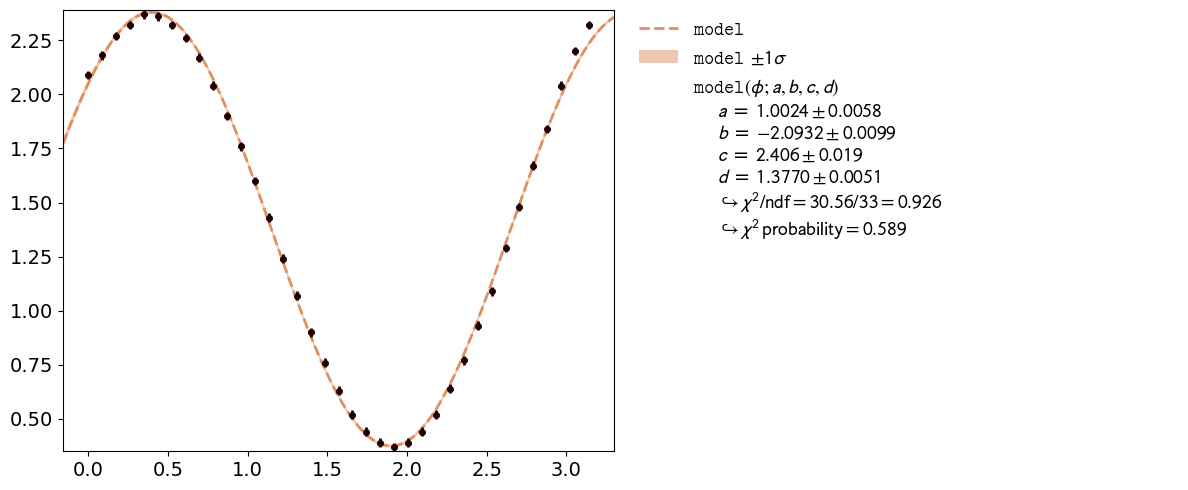

In [4]:
def model(phi, a=0.2, b=1, c=-np.pi/4, d=1.3):
    return a * np.sin(b*phi + c) + d
weiß_lin_data = np.array([unp.nominal_values(phi*np.pi/180), unp.nominal_values(I_weiß_lin)])
weiß_lin_error = np.array([unp.std_devs(phi*np.pi/180), unp.std_devs(I_weiß_lin)])
label = ["",""]
title = ""

weiß_lin_res = fit_funktion(weiß_lin_data, model, weiß_lin_error, label, title)
weiß_lin_res[2].plot()
weiß_lin_res[2].show()

### Aufgabe 2.2: Differenz der Brechungsindizes der beobachteten Strahlen

Bestimmen Sie die Differenz $\Delta n=\left(n_{\beta} - n_{\gamma}\right)$ der beobachteten Strahlen. Verwenden Sie hierzu die gemessenen Intensitätsverteilungen für den Fall elliptisch polarisierten Lichts.

---

Für diese Aufgabe haben wir die Intensität von elliptisch polarisiertem rotem Licht nach Durchgang durch Glimmerplättchen der Dicke $50\,\rm{\mu m}$ und $60\,\rm{\mu m}$ gemessen. Da die Glimmerplättchen zwei optische Achsen besitzen, sammeln die Anteile der Strahlen, die Aufgrund ihrer Polarisation unterschiedliche optische Achsen "sehen", Phasendifferenzen gegeneinander auf. Diese Differenz $\Delta n=(n_{\beta}-n_{\gamma})$ lässt sich über die in der Vorbereitung hergeleitete Formel berechnen:
$$\Delta n=\frac{\lambda_0}{2\pi d}arctan(\sqrt{\frac{U_{min}}{U_{max}}})$$
Die maximalen und minimalen Intensitäten (entprechen den gemessenen Spannungen) lassen sich aus den Fits der 2.1 bestimmen.
Für die Dicke des Glimmerplättchens von $d_1=60\,\rm{\mu m}$ ist  
- $U_{min}=(0.09\pm0.01)\,\rm{V}$  
- $U_{max}=(1.09\pm0.01)\,\rm{V}$  

Für die Dicke des Glimmerplättchens von $d_2=50\,\rm{\mu m}$ ist  
- $U_{min}=(0.07\pm0.01)\,\rm{V}$  
- $U_{max}=(0.31\pm0.01)\,\rm{V}$  

Die Wellenlänge des Lichts, nachdem es durch den Interferenzfarbfilter gelaufen ist, beträgt $\lambda_0=635\,\rm{nm}$

In [5]:
# Minimale und maximale Intensitäten in Volt, bestimmt aus der 2.1 per Fit
I_min_60 = ufloat(0.09 , 0.01)
I_max_60 = ufloat(1.09 , 0.01)
I_min_50 = ufloat(0.07 , 0.01)
I_max_50 = ufloat(0.31 , 0.01)
lbda = 635 * 10**(-9) # Meter
d1 = 60 * 10**(-6) # Meter
d2 = 50 * 10**(-6) # Meter

# Berechne delta n für beide Dicken
delta_n_60 = lbda * unp.arctan( unp.sqrt( I_min_60 / I_max_60 ) ) / ( 2 * np.pi * d1 )
delta_n_50 = lbda * unp.arctan( unp.sqrt( I_min_50 / I_max_50 ) ) / ( 2 * np.pi * d2 )
delta_n_arr = unp.uarray([ unp.nominal_values(delta_n_60) , unp.nominal_values(delta_n_50) ] , [ unp.std_devs(delta_n_60) , unp.std_devs(delta_n_60) ])
# Gewichteter Mittelwert der beiden Werte
delta_n = ufloat( weighted_mean_gauss( delta_n_arr ) , std_weighted_mean_gauss( delta_n_arr ) )

print(f"delta n mit Dicke 60um = {delta_n_60}")
print(f"delta n mit Dicke 50um = {delta_n_50}")
print(f"Gewichteter Mittelwert delta n = {delta_n:.5f}")

delta n mit Dicke 60um = 0.000471+/-0.000025
delta n mit Dicke 50um = 0.00090+/-0.00006
Gewichteter Mittelwert delta n = 0.00068+/-0.00030


Wir erhalten für die Differenz von "schnellem" und "langsamem" Brechungsindex folgenden gewichteten Mittelwert: $\Delta n=(6.8\pm3.0)\cdot 10^{-4}$. Beim Vergleich der einzelnen Werte fällt jedoch auf, dass der jeweils andere nicht im eigenen Unsicherheitsbereich liegt. Für das $60\,\rm{\mu m}$ dicke Glimmerplättchen erhalten wir nämlich $\Delta n=(4.71\pm0.25)\cdot 10^{-4}$, während das $50\,\rm{\mu m}$ dicke Glimmerplättchen $\Delta n=(9.0\pm0.6)\cdot 10^{-4}$ liefert. Der Unterschied kann gut daran liegen, dass die Glimmerplättchen nicht exakt ausgerichtet werden können, sondern die Ausrichtung Fehlerbehaftet ist. Dadurch hat das Licht nicht einen Weg von $60\,\rm{\mu m}$ bzw. $50\,\rm{\mu m}$ durch das Plättchen, sondern etwas mehr, da es dann eben schräg im Laufweg des Lichts steht. Da die Unterschiede der Brechungsindize aber offensichtlich sehr gering sind, macht sich dieser Fehler sehr stark bemerkbar, daher dieser große Unterschied.

## Aufgabe 3: Beobachtungen mit polarisiertem Licht

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Polarisation/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Beobachten Sie einige Beispiele, wo Doppelbrechung im Alltag auftaucht und z.T. auch technisch angewandt wird.
 - Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 3.1: Doppelbrechung am Klebefilm

 * An handelsüblichen Klebefilmen tritt Doppelbrechung auf, die Sie mit linear polarisiertem Licht sichtbar machen können. 
 * Untersuchen Sie die am Versuch ausliegenden Klebefilme und beschreiben Sie, was Sie beobachten.
 * Stellen Sie eigene Klebefilmkonstruktionen her, um sich mit dem beobachteten Phänomen vertraut zu machen. 
 * Fügen Sie Ihrem Protokoll entsprechende Aufnahmen zu. 

---

![gait](PicsOrItDidntHappen/gait.jpeg)
![miedse_gadse1](PicsOrItDidntHappen/miedse_gadse1.jpeg)
![miedse_gadse2](PicsOrItDidntHappen/miedse_gadse2.jpeg)

### Aufgabe 3.2: Doppelbrechung unter mechanischer Spannung

 * Eine technische Anwendung der Doppelbrechung besteht in der Sichtbarmachung von Stellen an Materialien, die besonderer mechanischer Spannung unterliegen. 
 * Am Versuch liegen einige Modelle aus. Versetzen Sie diese mechanischer Spannung und beobachten Sie die Transmission linear polarisierten Lichts. 
 * Beschreiben Sie, was Sie beobachten.
 * Fügen Sie Ihrem Protokoll entsprechende Aufnahmen zu. 

---

![doppelbr_ohne_schbannung](PicsOrItDidntHappen/doppelbr_ohne_schbannung.jpeg)
![doppelbr_schbannung](PicsOrItDidntHappen/doppelbr_schbannungng.jpeg)